Trabajo Practico - Ejercicio 3
Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva para: 
2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.


In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

pd.options.mode.chained_assignment = None

seaborn.set_context('talk')

##Descripción del DataSet
Para analizar la distribución de los salarios entre las personas que trabajan en el rubro de IT en Argentina con una perspectiva de género, partimos de la base de datos de la encuesta de salarios realizada por Open Qube y publicada en el blog de SysArmy[$^1$](https://sysarmy.com/blog/) para el año 2020[$^2$](https://sueldos.openqube.io/encuesta-sueldos-2020.01/#Introduccion).

La descripción de la metodología de muestreo empleada para la construcción y la representatividad ha sido publicada por OpenQube en ($^2$).

La base de datos fue exportada a un archivo .csv, cargada en un objeto tipo data.frame de Pandas en Python 3.9.5. El data set final contiene unicamente las series de datos de salario mensual neto y la categoría de género. La descriptiva del dataset puede consultarse en la Tabla I.

####TABLA I

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
filas = df.shape[0] 
columnas = df.shape[1] 
print (f"La base de datos cuenta con {columnas} columnas y {filas} filas")
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()


La base de datos cuenta con 48 columnas y 6095 filas


salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

##Exploración y Curación
No se cuenta con valores faltantes. Para el presente analisis se consideraron valores atipicos salarios netos declarados menores a ARS 1000. La descriptiva del nuevo dataset puede visualizarse en la Tabla II.

Los data sets curados a emplear se denominan Grupo A para los datos provenientes de individuos de género masculino y Grupo B para otros géneros, incluyendo el género femenino.

####TABLA II

In [3]:
df[df.salary_monthly_NETO > 1000][['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [4]:
n_total = sum(df.salary_monthly_NETO > 1000)
print ("Salarios Mensuales Netos < 1000AR$")
print (f"{filas - n_total} Entradas Eliminadas ({round((filas-n_total)*100/filas)}%)")

is_man = df.profile_gender == 'Hombre'

o_submil = sum((df.salary_monthly_NETO < 1000) & is_man)
h_submil = sum((df.salary_monthly_NETO < 1000) & ~is_man)

muestra_hombre = df[(df.salary_monthly_NETO > 1000) & is_man]
muestra_no_hombre = df[(df.salary_monthly_NETO > 1000) & ~is_man]

print (f"{o_submil} entradas de género masculino")
print (f"{h_submil} entradas de otros géneros")

Salarios Mensuales Netos < 1000AR$
389 Entradas Eliminadas (6%)
129 entradas de género masculino
47 entradas de otros géneros


In [5]:
muestra_hombre[['profile_gender', 'salary_monthly_NETO']].describe()

,salary_monthly_NETO
count,4.815000e+03
mean,1.014816e+05
std,1.022153e+05
min,1.100000e+03
25%,5.500000e+04
50%,8.000000e+04
75%,1.100000e+05
max,2.080000e+06


In [6]:
muestra_no_hombre[['profile_gender', 'salary_monthly_NETO']].describe()

,salary_monthly_NETO
count,891.000000
mean,78219.250943
std,56515.327324
min,2000.000000
25%,47600.000000
50%,67310.000000
75%,94000.000000
max,800000.000000


In [7]:
groupA = muestra_hombre.salary_monthly_NETO
groupB = muestra_no_hombre.salary_monthly_NETO

print (f"El número de valores NA en Group A es {groupA.isna().sum()}")
print (f"El número de valores NA en Group B es {groupB.isna().sum()}")

El número de valores NA en Group A es 0
El número de valores NA en Group B es 0


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


Text(16.000000000000014, 0.5, 'Frecuencia Observada')

<Figure size 432x288 with 0 Axes>

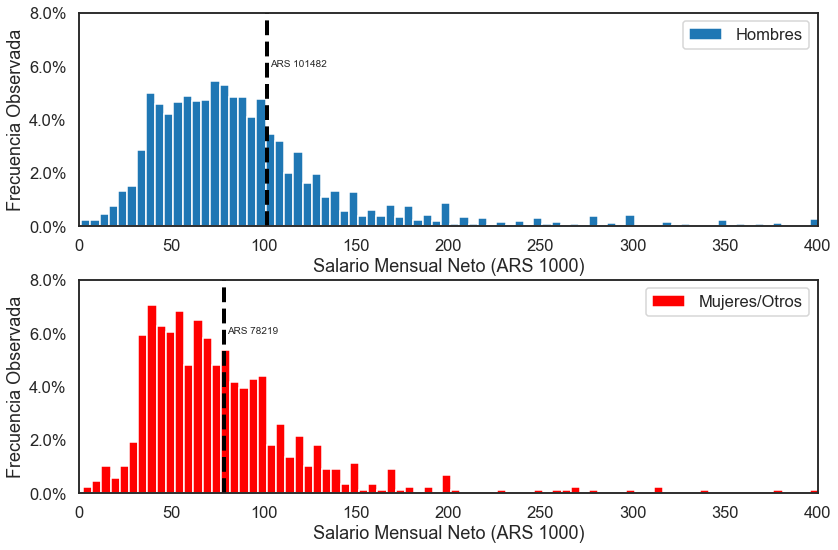

In [8]:
#@title Figura 1 - Histograma de Frecuencias
df_muestra = df[(df.salary_monthly_NETO > 1000)] 
seaborn.set_style('white')
seaborn.despine(left=True, bottom=True)

binsiz = 5
bins_A = int(np.ceil((np.max(groupA/1000) - np.min(groupA/1000))/binsiz))
bins_B = int(np.ceil((np.max(groupB/1000) - np.min(groupB/1000))/binsiz))

from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(12,8))

plt.subplot(2,1,2)
plt.hist(groupB/1000, weights=np.ones(len(groupB)) / len(groupB),label = 'Mujeres/Otros',bins = bins_B,color = 'red')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
plt.xlim(0,4e2)
plt.ylim(0,0.08)
plt.tight_layout(2)

plt.axvline(groupB.mean()/1000, color='black', linestyle='--',linewidth=4)
plt.text(groupB.mean()/1000+2,0.06,f'ARS {round(groupB.mean())}')

plt.xlabel("Salario Mensual Neto (ARS 1000)")
plt.ylabel("Frecuencia Observada")

plt.subplot(2,1,1)
plt.hist(groupA/1000, weights=np.ones(len(groupA)) / len(groupA),label = 'Hombres',bins = bins_A)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
plt.xlim(0,4e2)
plt.ylim(0,0.08)
plt.tight_layout(2)

plt.axvline(groupA.mean()/1000, color="black", linestyle='--', linewidth=4)
plt.text(groupA.mean()/1000+2,0.06,f'ARS {round(groupA.mean())}')

plt.xlabel("Salario Mensual Neto (ARS 1000)")
plt.ylabel("Frecuencia Observada")

Text(0, 0.5, 'Género')

<Figure size 432x432 with 0 Axes>

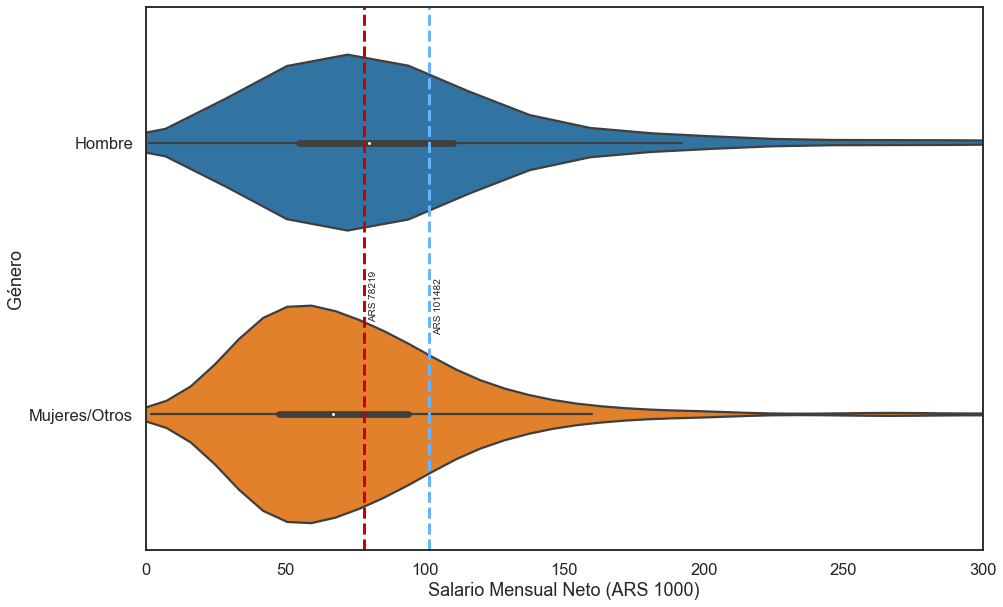

In [9]:
#@title Figura 2 - Diagrama de Violín
def is_hombre(gender):
  if gender == 'Hombre':
    return 'Hombre'
  else:
    return 'Mujeres/Otros'
df_muestra['Genero'] = df_muestra.profile_gender.apply (lambda x : is_hombre(x))
plt.figure(figsize=(6, 6))

df_muestra["salary_miles"] = df_muestra.salary_monthly_NETO/1000

plt.figure(figsize=(15,10))
seaborn.violinplot(data=df_muestra, x='salary_miles', y='Genero', order=["Hombre","Mujeres/Otros"])
plt.ticklabel_format(style='plain', axis='x')
plt.xlim([0,3e2])

plt.axvline(groupB.mean()/1000, color='#cc0000', linestyle='--',linewidth=3)
plt.axvline(groupA.mean()/1000, color="#66b3ff", linestyle='--', linewidth=3)

plt.text(groupA.mean()/1000+2,0.7,f'ARS {round(groupA.mean())}',rotation=90)
plt.text(groupB.mean()/1000+2,0.65,f'ARS {round(groupB.mean())}',rotation=90)

plt.xlabel("Salario Mensual Neto (ARS 1000)")
plt.ylabel("Género")

##Metodología
###Variable Aleatoria
La variable aleatoria para la que deseamos hacer la estimación es la diferencia de las medias muestrales de los salarios netos mensuales entre aquellos individuos del genero másculino ($A$) y de otros géneros ($B$), que denominaremos $\overline{X}_a - \overline{X}_b$.

Dado el tamaño de las muestras por el *Teorema Central del Límite*, independientemente de la distribución de las variables aleatorias de origen las medias muestrales $\overline{X}_a,\overline{X}_b$ ~ $N(\mu,\sigma)$. Para la diferencia de las medias muestrales es posible demostrar que:

$\overline{X}_a - \overline{X}_b$~ $N(\mu_a-\mu_b,\sigma_p^2)$

Para el análisis supondremos la independencia de ambas muestras de acuerdo a la metodología empleada por Open Qube.

###Diferencia Estadísticamente Significativa
Para descartar efectos aleatorios en la estimación de la diferencia de las medias muestrales se emplea una Prueba de Hipótesis para Diferencia de Medias Muestrales, para dos muestras independientes.
 
**Hipótesis Nula**

$H_0 \rightarrow \mu_a - \mu_b = 0 $

**Estadístico**

$T(n_p-1)=\frac{(\overline{X}_a - \overline{X}_b)-(\mu_a-\mu_b)}{\sqrt{\sigma_p^2/n_p}}$

La expresión para el estimador insesgado de la varianza poblacional $\sigma_p^2=V(\overline{X}_a - \overline{X}_b)$ depende de si podemos suponer varianzas iguales o diferentes. Igualmente la estimación del tamaño muestral ponderado $n_p$ depende de esta diferencia. 

Se realiza una prueba de hipótesis sobre el supuesto de homogeneidad de varianzas, puntualmente el Test de Levene, bajo $H_0 \rightarrow \sigma_a^2 = \sigma_b^2$

En caso de verificarse dicho supuesto se empleara un Test T de Student. En caso contrario se emplea Test T de Welch para varianzas no homogeneas. Se realiza un análisis de potencia para la prueba seleccionada, con el objetivo de asegurar $\beta>0.95$.



Adicionalmente, atendiendo a las recomendaciones de la Sociedad Americana de Estadística[$^3$](https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#.Vt2XIOaE2MN) que indica que en casos de conclusiones que puedan dar forma a políticas socioeconómicas de alto alcance, como por ejemplo las políticas de género, es importante no basar las conclusiones en un único test y/o p-valor.

Para reforzar las conclusiones se realizó Test de Smirnov-Kolmogorov para dos muestras independientes, donde:

$H_0 \rightarrow F(X_a) = F(X_b)$

i.e. la distribuciones de probabilidad acumulada de las variables aleatorias $\overline{X}_a,\overline{X}_b$ son la misma función. 

Este test no paramétrico emplea el estadístico:

$D_n = sup|F(X_a) - F(X_b)|$

Definiendo la zona de rechazo como,

$P(D_n \sqrt{\frac{n_a+n_b}{n_an_b}}>K_\alpha)=\alpha$

Donde $K_\alpha$ es el valor crítico en la distribución de Kolmogorov, que define la zona de rechazo en una prueba unilateral izquierda.  

En todos los casos el nivel de significancia empleado es $\alpha=0.05$.

###Estimación
En caso de existir evidencias de una diferencia estadísticamente significativa para las dos subpoblaciones se procede a realizar una estimación.

Por las propiedades de la función Esperanza $E(X)$ la esperanza de la diferencia entre dos variables aleatorias es la diferencia de sus esperanzas marginales i.e. $E(\overline{X}_a - \overline{X}_b)=E(\overline{X}_a)-E(\overline{X}_b)=\mu_a -\mu_b$. 

El estimador puntual de $E(X)$ es la media muestral,
por lo que un estimador puntual para este caso es la diferencia de las medias muestrales.

Se realiza una estimación por intervalos de confianza. Cumpliendose que i) ambas muestras son independientes y ii) las distribuciones marginales de las medias muestrales son normales, para la construcción del intervalos de confianza podemos emplear el estadístico

 $T_{(n_p-1)}=\frac{(\overline{X}_a - \overline{X}_b)-(\mu_a-\mu_b)}{\sqrt{\sigma_p^2/n_p}}$. 

 El intervalo de confianza tendrá la forma:

 $P[(\mu_a - \mu_b) \in [(\overline{X}_a - \overline{X}_b)\pm t_{(n_p-1,\alpha/2)}\sqrt{\sigma_p^2/n_p}]]=1-\alpha$

Con $\alpha = 0.05$ se obtiene un intervalo con un $95$% de confianza.

##Resultados
###Análisis de Potencia

In [10]:
alpha = 0.05

beta = 0.95

from statsmodels.stats.power import tt_ind_solve_power

effect_size = (groupA.mean() - groupB.mean()) / groupB.std()

ratio = len(groupB) / len(groupA)

print (f"Potencia {beta*100}%, n = {round(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=beta, ratio=ratio))}")

Potencia 95.0%, n = 493


Para una potencia del $95$% bajo la distribución supuesta se requiere un tamaño muestral $n>493$. Siendo $n_a$ y $n_b$ mayores que este valor se deduce que $n_p>493$ con lo que la prueba propuesta tiene la potencia suficiente.

###Test de Levene

In [11]:
import scipy

(_, pvalue) = scipy.stats.levene(groupA, groupB)

print (f"Se {'rechaza' if pvalue < alpha else 'Acepta'} H0 (Varianzas Iguales) para una significancia del 5% con pvalue = {round(pvalue, ndigits=7)} ")

Se rechaza H0 (Varianzas Iguales) para una significancia del 5% con pvalue = 1.3e-06 


Para el Prueba de Hipótesis de diferencia de medias empleamos el Test T de Welch. Los estimadores insesgados empleados tienen la siguiente forma:

$\sigma_p^2 = \frac{\sigma_a^2}{n_a} + \frac{\sigma_b^2}{n_b}$

$n_p = \frac
{(\frac{\sigma_a^2}{n_a} + \frac{\sigma_b^2}{n_b})^2}
{
  \frac{(\sigma_a^2/n_a)^2}{n_a -1} +
  \frac{(\sigma_b^2/n_b)^2}{n_b -1}
  }$

 Definimos la zona de rechazo para una prueba bilateral tal que $H_0$ se acepta para 
  
  $t_{(\alpha/2,n_p-1)}<T_{(n_p-1)}<t_{(1-\alpha/2,n_p-1)}$

In [12]:
(_,pvalue) = scipy.stats.ttest_ind(groupA, groupB , equal_var=False)

print (f"Según lo descrito aplicando el Test de Welch: pvalue = {pvalue}.\nTomando un nivel de significancia del 5% se {'rechaza' if pvalue < alpha else 'Acepta'} H0.")

Según lo descrito aplicando el Test de Welch: pvalue = 8.605197322133209e-22.
Tomando un nivel de significancia del 5% se rechaza H0.


###Test de Kolmogorov_Smirnov
Graficamos los percentiles de la función de distribución acumulada (CDF) y los perncentiles de la función de densidad (PDF).


(0.0, 1.01)

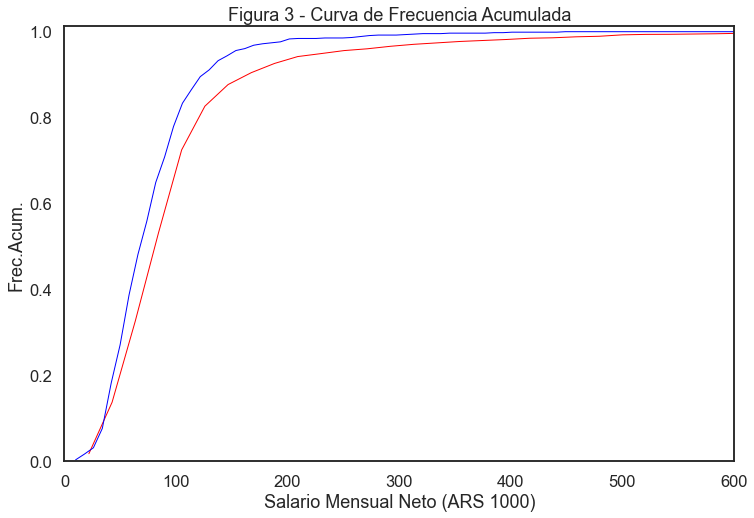

In [13]:
countA, bins_countA = np.histogram(groupA/1000, bins=100)
countB, bins_countB = np.histogram(groupB/1000, bins=100)

pdfA = countA / sum(countA)
pdfB = countB / sum(countB)

cdfA = np.cumsum(pdfA)
cdfB = np.cumsum(pdfB)
plt.figure(figsize=(12,8))
plt.plot(bins_countA[1:], cdfA, label="CDF" , color="red" , linewidth="1")
plt.plot(bins_countB[1:], cdfB, label="CDF" , color="blue" , linewidth="1")
plt.title("Figura 3 - Curva de Frecuencia Acumulada")
plt.xlabel("Salario Mensual Neto (ARS 1000)")
plt.ylabel("Frec.Acum.")
plt.xlim(0,6e2)
plt.ylim(0,1.01)

(0.0, 0.25)

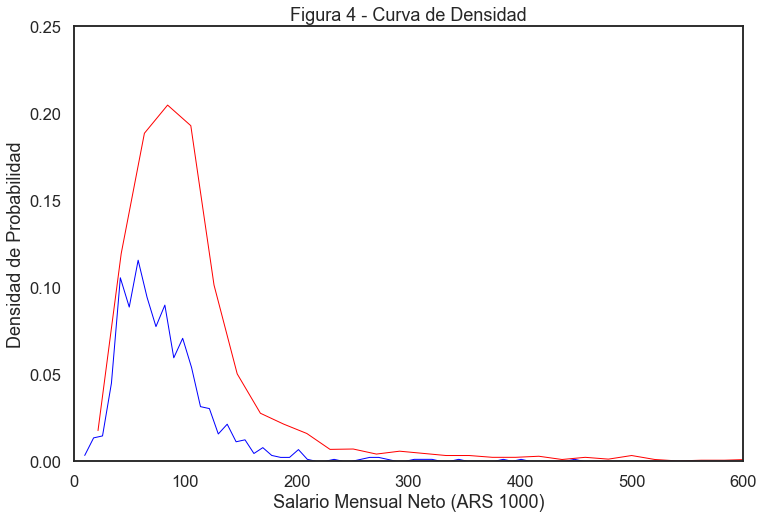

In [14]:
plt.figure(figsize=(12,8))
plt.plot(bins_countA[1:], pdfA, color="red", label="PDF" , linewidth="1")
plt.plot(bins_countB[1:], pdfB, color="blue", label="PDF", linewidth="1")
plt.title("Figura 4 - Curva de Densidad")
plt.xlabel("Salario Mensual Neto (ARS 1000)")
plt.ylabel("Densidad de Probabilidad")
plt.xlim(0,6e2)
plt.ylim(0,0.25)

In [15]:
from scipy.stats import ks_2samp

(_ , pvalue) = ks_2samp(groupA, groupB)
print (f" Se  {'Rechaza' if pvalue < alpha else 'Acepta'} H0 (misma distribución) , pvalue = {pvalue} ")

 Se  Rechaza H0 (misma distribución) , pvalue = 1.5432100042289676e-14 


El resultado nos indica que aún sin hacer ninguna asunción respecto de las distribuciones de las variables originales, podemos afirmar que $X_a$ y $X_b$ provienen de distribuciones distintas.

###Estimación
Las evidencias presentadas apuntan a que existe en efecto una diferencia significativa en los salarios mensaules netos, que atiende a diferencias de género. 

Suponiendo no homogeneidad de varianzas obtenemos el intervalo de confianza para $\sigma_p^2, n_p$ como:


In [16]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(groupA.values), sms.DescrStatsW(groupB.values))
cm.tconfint_diff(usevar='unequal')
li,ls = cm.tconfint_diff(usevar='unequal' , alpha = alpha )

print (f"Asumiendo varianzas distintas")
print (f"Diferencia medias muestrales: ARS {round(groupA.mean()-groupB.mean())}")
print (f"Intervalo de confianza 95% (IC95): ARS ({round(li)},{round(ls)})" )

Asumiendo varianzas distintas
Diferencia medias muestrales: ARS 23262
Intervalo de confianza 95% (IC95): ARS (18558,27967)


##Discusion
La estimación de dicha diferencia según los datos del año 2020 en Argentina es:

$IC_{95}: (LI,LS) = ARS(18558,27967)$ 

La diferencia estimada favorece a aquellos individuos de género másculino, quienes en promedio ganan $ARS 23262$ más que individuos de otros géneros. Esta diferencia es mayor a un Salario Mínimo Vital y Móvil en Argentina a Diciembre 2020, que ascendia a $ARS 20587.00$ [$^4$](https://datosmacro.expansion.com/smi/argentina).